In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import selfDefinedFunction as sdf

# Introduction

Background  
Main Question  
Methodology  
Primary Findings(Conclusion)  
Future Direction

# EDA

In [3]:
df_raw = pd.read_csv('../data/airport_choice_survey_practice_Shuai.csv')

## Missing Values

### Inspection

Many variables have missing values. The variables of "Mileage", "MileageAirline", "AccessCost", "FightNo", "Income", "DepartureMn" have more than one fifth missing values. 

In [4]:
missingValueRaw = sdf.sumMissing(df_raw).rename(columns={0: 'Count_rawData', 1: 'Percentage_rawData'})
missingValueRaw = missingValueRaw.reset_index()
missingValueRaw

,index,Count_rawData,Percentage_rawData
0,ID,0,0.00
1,Airport,0,0.00
2,Airline,10,2.05
3,Age,1,0.20
4,Gender,3,0.61
5,Nationality,0,0.00
6,TripPurpose,0,0.00
7,TripDuration,0,0.00
8,FlyingCompanion,0,0.00
9,ProvinceResidence,0,0.00


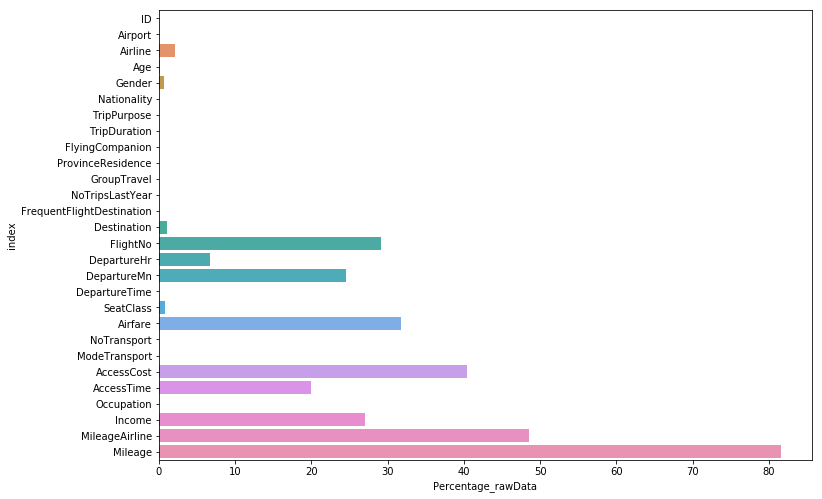

In [5]:
sdf.horzBarPlot(missingValueRaw,'Percentage_rawData','index')

### Principles for dealing with missing values 

Considering the small data set(488 records), the project team cannot drop records with missing values. The strategy of "best reasonable guess" will be applied in filling the missing data under the following princples:  

(1) __Airline, Airport, Destination, FlightNo, DepartureHr, DepartureMn__:  
    These six variables are correlated. The project team will manually cross check all existing information and missing values within the dataset, and also, double check the flight details from the airport's website to rectify the miss spelling flight number and inaccurate departure time, airport information, etc. The categorical missing values which cannot be inferred from other relevant variables will be filled with "NotRespond," and the numerical missing values will be replaced with 0.    
    
(2) __Gender__:  
Missing values will be replaced as "NotRespond".  

(3) __Age__:  
Missing values will be filled with mode number.  

(4) __Seat Class__:  
Missing values will be filled with mode number.  

(5) __Airfare__:  
Missing values will be replaced as following sequential steps:  
a. median "Airfare" with the same "FilightNo" and "SeatClass";  
b. median "Airfare" with the same "FlightNo";  
c. median "Airfare" with the same "Destination";  
d. median "Airfare". 

(6) __AccessCost__: 
Missing values will be replaced as following sequential steps:  
a. median "AccessCost" with the same "Airport", "ProvinceResidence", "ModeTRansport" and "NoTRansport";  
b. median "AccessCost" with the same "Airport", "ProvinceResidence", and "ModeTRansport";  
c. median "AccessCost" with the same "Airport" and "ProvinceResidence";  
d. median "AccessCost". 
 
(7) __AccessTime__: 
Missing values will be replaced as following sequential steps:  
a. median "AccessTime" with the same "Airport", "ProvinceResidence", "ModeTRansport" and "NoTRansport";  
b. median "AccessTime" with the same "Airport", "ProvinceResidence", and "ModeTRansport";  
c. median "AccessTime" with the same "Airport" and "ProvinceResidence";  
d. median "AccessTime". 
 
(8) __Income__:  
Missing values will be replaced as following sequential steps:  
a. median "Income" with the same "ProvinceResidence", "Occupation" and "Age";  
b. median "Income" with the same "ProvinceResidence" and "Occupation";  
c. median "Income" with the same "ProvinceResidence".  

(9) __Destination__:  
Missing values will be replaced as "NotRespond". 

(10) __MieageAirline and Mileage__:  
These two columns will be dropped, because the passengers' membership and mileage do not related to the transportation mode. 

### Data Cleaning

#### Airline, Destination, FlightNo, DepartureHr, DepartureMn
This part is proceeded manually in Excel. 

In [6]:
df = pd.read_csv('../data/airport_choice_survey_practice_updated_Shuai.csv')

In [7]:
missingValue_1 = sdf.sumMissing(df).rename(columns={0: 'Count_1', 1: 'Percentage_1'})
missingValue_1 = missingValue_1.reset_index()
compare = sdf.compareDF(missingValueRaw,missingValue_1)
compare['decrease'] = compare['Percentage_rawData'] - compare['Percentage_1']
compare.iloc[['2','13','14','15','16']]

,index,Count_rawData,Percentage_rawData,Count_1,Percentage_1,decrease
2,Airline,10,2.05,0,0.0,2.05
13,Destination,5,1.02,0,0.0,1.02
14,FlightNo,142,29.10,0,0.0,29.10
15,DepartureHr,33,6.76,0,0.0,6.76
16,DepartureMn,120,24.59,0,0.0,24.59


After fixing the data of __Airline, Destination, FlightNo, DepartureHr, DepartureMn__, the rate of missing value of these four variable have decreased to Zero.

#### Gender

In [8]:
df['Gender'].fillna('NotRespond', inplace=True)

#### Seat Class

In [9]:
df['SeatClass'].fillna(df['SeatClass'].mode()[0], inplace=True)

In [10]:
missingValue_2 = sdf.sumMissing(df).rename(columns={0: 'Count_2', 1: 'Percentage_2'})
missingValue_2 = missingValue_2.reset_index()
compare = sdf.compareDF(missingValue_1,missingValue_2)
compare['decrease'] = compare['Percentage_1'] - compare['Percentage_2']
compare.iloc[18]

index           SeatClass
Count_1                 4
Percentage_1         0.82
Count_2                 0
Percentage_2            0
decrease             0.82
Name: 18, dtype: object

After fixing the data of __SeatClass__, the rate of missing value of this variable have decreased by 0.82%. There is no missing value at this variable. 

#### Airfare

##### median "Airfare" with the same "FilightNo" and "SeatClass"

In [11]:
df = sdf.fillAirfare(df,['FlightNo','SeatClass','Airfare'],['FlightNo','SeatClass'] )

In [12]:
missingValue_3 = sdf.sumMissing(df).rename(columns={0: 'Count_3', 1: 'Percentage_3'})
missingValue_3 = missingValue_3.reset_index()
compare = sdf.compareDF(missingValue_2,missingValue_3)
compare['decrease'] = compare['Percentage_2'] - compare['Percentage_3']
compare.iloc[19]

index           Airfare
Count_2             155
Percentage_2      31.76
Count_3              36
Percentage_3       7.38
decrease          24.38
Name: 19, dtype: object

Missing rate of __Airfare__ decrease by 19.87%.

##### median "Airfare" with the same "FlightNo"

In [13]:
df = sdf.fillAirfare(df,['FlightNo','Airfare'],['FlightNo'] )

In [14]:
missingValue_4 = sdf.sumMissing(df).rename(columns={0: 'Count_4', 1: 'Percentage_4'})
missingValue_4 = missingValue_4.reset_index()
compare = sdf.compareDF(missingValue_3,missingValue_4)
compare['decrease'] = compare['Percentage_3'] - compare['Percentage_4']
compare.iloc[19]

index           Airfare
Count_3              36
Percentage_3       7.38
Count_4              27
Percentage_4       5.53
decrease           1.85
Name: 19, dtype: object

Missing rate of __Airfare__ decrease by 1.44%.

##### median "Airfare" with the same "Destination"

In [15]:
df = sdf.fillAirfare(df,['Destination','Airfare'],['Destination'] )

In [16]:
missingValue_5 = sdf.sumMissing(df).rename(columns={0: 'Count_5', 1: 'Percentage_5'})
missingValue_5 = missingValue_5.reset_index()
compare = sdf.compareDF(missingValue_4,missingValue_5)
compare['decrease'] = compare['Percentage_4'] - compare['Percentage_5']
compare.iloc[19]

index           Airfare
Count_4              27
Percentage_4       5.53
Count_5               0
Percentage_5          0
decrease           5.53
Name: 19, dtype: object

Missing rate of __Airfare__ decrease by 10.04%. Now, the missing rate of __Airfare__ is 0.41%.

##### median "Airfare"

In [17]:
df['Airfare'].fillna(df['Airfare'].mode()[0], inplace=True)

#### AccessCost 

##### median "AccessCost" with the same "Airport", "ProvinceResidence", "ModeTRansport" and "NoTRansport"

In [18]:
df = sdf.fillAccessCost(df,['Airport','AccessCost', 'ProvinceResidence', 'NoTransport', 'ModeTransport'],['Airport','ProvinceResidence', 'NoTransport', 'ModeTransport'])

In [19]:
missingValue_6 = sdf.sumMissing(df).rename(columns={0: 'Count_6', 1: 'Percentage_6'})
missingValue_6 = missingValue_6.reset_index()
compare = sdf.compareDF(missingValue_5,missingValue_6)
compare['decrease'] = compare['Percentage_5'] - compare['Percentage_6']
compare.iloc[22]

index           AccessCost
Count_5                197
Percentage_5         40.37
Count_6                 58
Percentage_6         11.89
decrease             28.48
Name: 22, dtype: object

Missing rate of __AccessCost__ decrease by 28.48%. Now, the missing rate of AccessCost is 11.89%.

##### median "AccessCost" with the same "Airport", "ProvinceResidence", and "ModeTRansport"

In [20]:
df = sdf.fillAccessCost(df,['Airport','AccessCost', 'ProvinceResidence', 'ModeTransport'],['Airport','ProvinceResidence', 'ModeTransport'])

In [21]:
missingValue_7 = sdf.sumMissing(df).rename(columns={0: 'Count_7', 1: 'Percentage_7'})
missingValue_7 = missingValue_7.reset_index()
compare = sdf.compareDF(missingValue_6,missingValue_7)
compare['decrease'] = compare['Percentage_6'] - compare['Percentage_7']
compare.iloc[22]

index           AccessCost
Count_6                 58
Percentage_6         11.89
Count_7                 49
Percentage_7         10.04
decrease              1.85
Name: 22, dtype: object

Missing rate of __AccessCost__ decrease by 1.85%. Now, the missing rate of AccessCost is 10.04%.

##### median "AccessCost" with the same "Airport" and "ProvinceResidence"

In [22]:
df = sdf.fillAccessCost(df,['Airport','AccessCost', 'ProvinceResidence'],['Airport','ProvinceResidence'])

In [23]:
missingValue_8 = sdf.sumMissing(df).rename(columns={0: 'Count_8', 1: 'Percentage_8'})
missingValue_8 = missingValue_8.reset_index()
compare = sdf.compareDF(missingValue_7,missingValue_8)
compare['decrease'] = compare['Percentage_7'] - compare['Percentage_8']
compare.iloc[22]

index           AccessCost
Count_7                 49
Percentage_7         10.04
Count_8                  0
Percentage_8             0
decrease             10.04
Name: 22, dtype: object

Missing rate of __AccessCost__ decrease by 10.04%. Now, the missing rate of AccessCost is zero.

#### AccessTime

##### median "AccessTime" with the same "Airport", "ProvinceResidence", "ModeTRansport" and "NoTRansport"

In [24]:
df = sdf.fillAccessTime(df,['Airport','AccessTime', 'ProvinceResidence', 'ModeTransport', 'NoTransport'],['Airport', 'ProvinceResidence', 'ModeTransport', 'NoTransport'])

In [25]:
missingValue_9 = sdf.sumMissing(df).rename(columns={0: 'Count_9', 1: 'Percentage_9'})
missingValue_9 = missingValue_9.reset_index()
compare = sdf.compareDF(missingValue_8,missingValue_9)
compare['decrease'] = compare['Percentage_8'] - compare['Percentage_9']
compare.iloc[23]

index           AccessTime
Count_8                 97
Percentage_8         19.88
Count_9                 17
Percentage_9          3.48
decrease              16.4
Name: 23, dtype: object

Missing rate of __AccessTime__ decrease by 16.4%. Now, the missing rate of AccessTime is 3.48%.

##### median "AccessTime" with the same "Airport", "ProvinceResidence", and "ModeTRansport"

In [26]:
df = sdf.fillAccessTime(df,['Airport','AccessTime', 'ProvinceResidence', 'ModeTransport'],['Airport', 'ProvinceResidence', 'ModeTransport'])

In [27]:
missingValue_10 = sdf.sumMissing(df).rename(columns={0: 'Count_10', 1: 'Percentage_10'})
missingValue_10 = missingValue_10.reset_index()
compare = sdf.compareDF(missingValue_9,missingValue_10)
compare['decrease'] = compare['Percentage_9'] - compare['Percentage_10']
compare.iloc[23]

index            AccessTime
Count_9                  17
Percentage_9           3.48
Count_10                 11
Percentage_10          2.25
decrease               1.23
Name: 23, dtype: object

Missing rate of __AccessTime__ decrease by 1.23%. Now, the missing rate of AccessTime is 2.25%.

##### median "AccessTime" with the same "Airport" and "ProvinceResidence"

In [28]:
df = sdf.fillAccessTime(df,['Airport','AccessTime', 'ProvinceResidence'],['Airport', 'ProvinceResidence'])

In [29]:
missingValue_11 = sdf.sumMissing(df).rename(columns={0: 'Count_11', 1: 'Percentage_11'})
missingValue_11 = missingValue_11.reset_index()
compare = sdf.compareDF(missingValue_10,missingValue_11)
compare['decrease'] = compare['Percentage_10'] - compare['Percentage_11']
compare.iloc[23]

index            AccessTime
Count_10                 11
Percentage_10          2.25
Count_11                  0
Percentage_11             0
decrease               2.25
Name: 23, dtype: object

Missing rate of __AccessTime__ decrease by 2.25%. Now, the missing rate of AccessTime is Zero.

#### Income

##### median "Income" with the same "ProvinceResidence", "Occupation" and "Age"

In [30]:
df = sdf.fillIncome(df,['Income','Age', 'Occupation','ProvinceResidence'],['Age', 'Occupation','ProvinceResidence'])

In [31]:
missingValue_12 = sdf.sumMissing(df).rename(columns={0: 'Count_12', 1: 'Percentage_12'})
missingValue_12 = missingValue_12.reset_index()
compare = sdf.compareDF(missingValue_11,missingValue_12)
compare['decrease'] = compare['Percentage_11'] - compare['Percentage_12']
compare.iloc[25]

index            Income
Count_11            132
Percentage_11     27.05
Count_12            117
Percentage_12     23.98
decrease           3.07
Name: 25, dtype: object

Missing rate of __Income__ decrease by 3.07%. Now, the missing rate of Income is 23.98%.

##### median "Income" with the same "ProvinceResidence" and "Occupation" 

In [32]:
df = sdf.fillIncome(df,['Income','Occupation','ProvinceResidence'],['Occupation','ProvinceResidence'])

In [33]:
missingValue_13 = sdf.sumMissing(df).rename(columns={0: 'Count_13', 1: 'Percentage_13'})
missingValue_13 = missingValue_13.reset_index()
compare = sdf.compareDF(missingValue_12,missingValue_13)
compare['decrease'] = compare['Percentage_12'] - compare['Percentage_13']
compare.iloc[25]

index            Income
Count_12            117
Percentage_12     23.98
Count_13             23
Percentage_13      4.71
decrease          19.27
Name: 25, dtype: object

Missing rate of __Income__ decrease by 19.27%. Now, the missing rate of Income is 4.7%.

##### median "Income" with the same "ProvinceResidence"

In [34]:
df = sdf.fillIncome(df,['Income','ProvinceResidence'],['ProvinceResidence'])

In [35]:
missingValue_14 = sdf.sumMissing(df).rename(columns={0: 'Count_14', 1: 'Percentage_14'})
missingValue_14 = missingValue_14.reset_index()
compare = sdf.compareDF(missingValue_13,missingValue_14)
compare['decrease'] = compare['Percentage_13'] - compare['Percentage_14']
compare.iloc[25]

index            Income
Count_13             23
Percentage_13      4.71
Count_14              0
Percentage_14         0
decrease           4.71
Name: 25, dtype: object

Missing rate of __Income__ decrease by 4.71%. Now, the missing rate of Income is Zero.

#### Age

##### Missing Age will be filled with mode. 

In [36]:
df['Age'].fillna(df['Age'].mode()[0], inplace=True)

In [37]:
missingValue_14 = sdf.sumMissing(df).rename(columns={0: 'Count_14', 1: 'Percentage_14'})
missingValue_14 = missingValue_14.reset_index()
compare = sdf.compareDF(missingValue_13,missingValue_14)
compare['decrease'] = compare['Percentage_13'] - compare['Percentage_14']
compare.iloc[3]

index            Age
Count_13           1
Percentage_13    0.2
Count_14           0
Percentage_14      0
decrease         0.2
Name: 3, dtype: object

#### MileageAirline and Mileage

Drop these two variables.

In [38]:
df = df.drop(columns = ['MileageAirline', 'Mileage'])

#### Second Check for Missing Values

No Missing Values in the data set after the cleaning. 

In [39]:
missingValue = sdf.sumMissing(df).rename(columns={0: 'Count', 1: 'Percentage'})
missingValue = missingValue.reset_index()
missingValue

,index,Count,Percentage
0,ID,0,0.0
1,Airport,0,0.0
2,Airline,0,0.0
3,Age,0,0.0
4,Gender,0,0.0
5,Nationality,0,0.0
6,TripPurpose,0,0.0
7,TripDuration,0,0.0
8,FlyingCompanion,0,0.0
9,ProvinceResidence,0,0.0


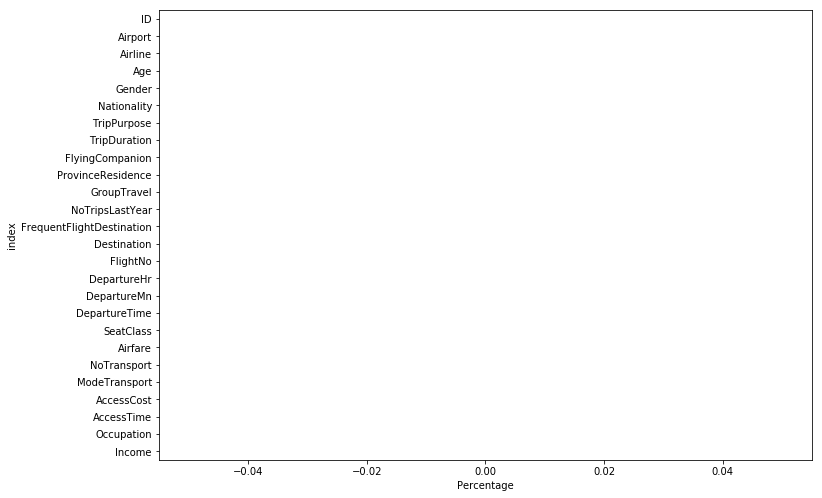

In [40]:
sdf.horzBarPlot(missingValue,'Percentage','index')

In [41]:
df.to_csv("../data/df_Shuai.csv")

## Data Type

### Preview Data Type

In [42]:
df.dtypes

ID                             int64
Airport                        int64
Airline                       object
Age                          float64
Gender                        object
Nationality                    int64
TripPurpose                    int64
TripDuration                   int64
FlyingCompanion                int64
ProvinceResidence              int64
GroupTravel                    int64
NoTripsLastYear                int64
FrequentFlightDestination     object
Destination                   object
FlightNo                      object
DepartureHr                    int64
DepartureMn                    int64
DepartureTime                  int64
SeatClass                    float64
Airfare                      float64
NoTransport                    int64
ModeTransport                  int64
AccessCost                   float64
AccessTime                   float64
Occupation                     int64
Income                       float64
dtype: object

### Princple for Converting Data Type

__object:__ ID  
__int64:__  Age, TripDuration, FlyingCompanion, NoTripsLastYear, NoTransport  
__float64:__  DepartureHr, DepartureMn, Airfare, AccessCost, AccessTime  
__category:__ Airport, Airline, Gender, Nationality, TripPurpose, ProvinceResidence, GroupTravel, FrequentFlightDestination, Destination, FlightNo, DepartureTime, SeatClass, ModeTransport, Occupation, Income

### Convert Data Type

In [43]:
df['ID'] = df['ID'].astype('object')

In [44]:
for i in ['Age','TripDuration', 'FlyingCompanion', 'NoTripsLastYear', 'NoTransport']:
    df[i] = df[i].astype('int64')

In [45]:
for i in ['DepartureHr', 'DepartureMn', 'Airfare', 'AccessCost', 'AccessTime']:
    df[i] = df[i].astype('float64')

In [46]:
for i in ['Airport', 'Airline', 'Gender', 'Nationality', 'TripPurpose', 'ProvinceResidence', 'GroupTravel', 'FrequentFlightDestination', 'Destination', 'FlightNo', 'DepartureTime', 'SeatClass', 'ModeTransport', 'Occupation', 'Income']:
    df[i] = df[i].astype('category')

In [47]:
df.dtypes

ID                             object
Airport                      category
Airline                      category
Age                             int64
Gender                       category
Nationality                  category
TripPurpose                  category
TripDuration                    int64
FlyingCompanion                 int64
ProvinceResidence            category
GroupTravel                  category
NoTripsLastYear                 int64
FrequentFlightDestination    category
Destination                  category
FlightNo                     category
DepartureHr                   float64
DepartureMn                   float64
DepartureTime                category
SeatClass                    category
Airfare                       float64
NoTransport                     int64
ModeTransport                category
AccessCost                    float64
AccessTime                    float64
Occupation                   category
Income                       category
dtype: objec

## Departing Airport 

There is no missing value in this variable. The records from GMP is slightly more than the records from ICN. 

In [ ]:
#df['Airport'] = df['Airport'].replace(1, "ICN")
#df['Airport'] = df['Airport'].replace(2, "GMP")

sns.countplot(x="Airport", data=df).set_xticklabels(["ICN","GMP"])
plt.title('Records from Two Airports')
plt.xlabel('Airport Choice')

# EDA: Airline

In [ ]:
sns.countplot(x="Airline", data=df.#set_xticklabels(["ICN","GMP"])
plt.title('Records of Airline Companies')
plt.xlabel('Airline Choice')

## Data wrangling principles
Error value:  
(1) Error value of W7667 in the field of "DepartureHR" of "ID 399". Correct this record by moving W7667 into "FlightNo"  
Missing Value:   
(2) The missing values of following fields will be replaced with mode number  
(3) The missing values of following fields will be replaced with zero  
(4) The following fields will be removed because too many missing values and also it is not related to the traveler's choice.   
    - MileageAirline 
    - Mileage

In [ ]:
df = df.drop(columns=['MileageAirline', 'Mileage'])

In [ ]:
df['FlightNo']=df['FlightNo'].str.upper()

In [ ]:
# Convert to dummies
# df2 = pd.get_dummies(df['Airport'], prefix=['Airport'])
# df3 = df.join(df2, how='outer')

In [ ]:
df.info()

## EDA  

The EDA will be guided by following questions: 
1. In this data set, what's distribution of records departing from ICN and GMP?  


In [ ]:
df['Airport'] = df['Airport'].replace(1, "ICN")
df['Airport'] = df['Airport'].replace(2, "GMP")
df2 = pd.get_dummies(df['Airport'],prefix=['Airport'])

In [ ]:
df2

In [ ]:
df['FlightTime'] = df['DepartureHr'].map(str)+":"+df['DepartureMn'].map(str)

In [ ]:
pd.options.display.max_columns = None
display(df)

In [ ]:
pd.Series(df.FlightTime.values,index=df.FlightNo).to_dict()

In [ ]:
pd.Series(df.FlightNo.values,index=df.FlightInfo).to_dict()

In [ ]:
from IPython.display import HTML
def View(df):
    css = """<style>
    table { border-collapse: collapse; border: 3px solid #eee; }
    table tr th:first-child { background-color: #eeeeee; color: #333; font-weight: bold }
    table thead th { background-color: #eee; color: #000; }
    tr, th, td { border: 1px solid #ccc; border-width: 1px 0 0 1px; border-collapse: collapse;
    padding: 3px; font-family: monospace; font-size: 10px }</style>
    """
    s  = '<script type="text/Javascript">'
    s += 'var win = window.open("", "Title", "toolbar=no, location=no, directories=no, status=no, menubar=no, scrollbars=yes, resizable=yes, width=780, height=200, top="+(screen.height-400)+", left="+(screen.width-840));'
    s += 'win.document.body.innerHTML = \'' + (df.to_html() + css).replace("\n",'\\') + '\';'
    s += '</script>'
    return(HTML(s+css))

View(df)